# **PROJECT : EVALUATE CARS CONDITION BASED ON GIVEN FEATURES**

1. Step 1: Import Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# **2. Import DataSet**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning (1)/Code/3. Decision Tree/Copy of cars.csv", header =None)
df.columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
# check category level of all columns
for col in df.columns:
  print("-----------------{}---------------------".format(col))
  print(df[col].value_counts())
  print()

-----------------buying---------------------
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

-----------------maint---------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

-----------------doors---------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

-----------------persons---------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64

-----------------lug_boot---------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

-----------------safety---------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64

-----------------class---------------------
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In the above values count we can see in two columns we have category and numbers so we need to replace the categories with numbers using label encoder

### **STEP 3: DATA PROCESSING**

In [6]:
# check missing values
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In the Above data we can see there is no missing values

In [7]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
le =LabelEncoder()
for x in df.columns:
  df[x] = le.fit_transform(df[x])
  le_name=dict(zip(le.classes_,le.transform(le.classes_)))
  print("--------------------------------------")
  print("Feature",x)
  print("Mapping: ",le_name)

--------------------------------------
Feature buying
Mapping:  {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
--------------------------------------
Feature maint
Mapping:  {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
--------------------------------------
Feature doors
Mapping:  {'2': 0, '3': 1, '4': 2, '5more': 3}
--------------------------------------
Feature persons
Mapping:  {'2': 0, '4': 1, 'more': 2}
--------------------------------------
Feature lug_boot
Mapping:  {'big': 0, 'med': 1, 'small': 2}
--------------------------------------
Feature safety
Mapping:  {'high': 0, 'low': 1, 'med': 2}
--------------------------------------
Feature class
Mapping:  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


# **Step 4:Seperate X and Y**

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# **Step 5: Data Spliting**

In [10]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
# verify splitting data
print("Total Data: ", df.shape)
print("Train X: ", X_train.shape)
print("Test X: ", X_test.shape)
print("Train Y: ", y_train.shape)
print("Test Y: ", y_test.shape)

Total Data:  (1728, 7)
Train X:  (1209, 6)
Test X:  (519, 6)
Train Y:  (1209,)
Test Y:  (519,)


In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()

##saclar.fir.(X_train)

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)
y=y.astype(int)

In [12]:
X_train_scaled

array([[-1.3409124 , -1.35050641, -0.45396175,  1.20943155, -1.21542436,
        -1.20695626],
       [-0.45260386,  1.31305354, -1.34929577,  1.20943155,  0.00707818,
         0.01108224],
       [ 0.43570469,  1.31305354,  0.44137227,  1.20943155,  1.22958071,
         0.01108224],
       ...,
       [-1.3409124 ,  1.31305354,  1.33670629, -0.013146  ,  0.00707818,
        -1.20695626],
       [ 0.43570469,  0.42520022,  0.44137227, -0.013146  , -1.21542436,
         0.01108224],
       [ 0.43570469, -0.46265309,  1.33670629,  1.20943155,  1.22958071,
        -1.20695626]])

In [13]:
X_test_scaled

array([[ 0.43570469,  1.31305354,  1.33670629, -0.013146  ,  1.22958071,
         0.01108224],
       [ 1.32401323, -1.35050641, -1.34929577, -1.23572354, -1.21542436,
         1.22912073],
       [-0.45260386, -1.35050641, -1.34929577,  1.20943155,  1.22958071,
         0.01108224],
       ...,
       [-0.45260386, -1.35050641,  0.44137227, -0.013146  , -1.21542436,
        -1.20695626],
       [-1.3409124 , -0.46265309,  0.44137227,  1.20943155,  1.22958071,
         0.01108224],
       [-1.3409124 ,  0.42520022,  1.33670629,  1.20943155, -1.21542436,
         1.22912073]])

In [14]:
## run basic model
from sklearn.linear_model import LogisticRegression

## creat a modal
classifier=LogisticRegression()

## fitting training data to the modal
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [15]:
## prediction
y_pred=classifier.predict(X_test_scaled)


In [16]:
print(list(zip(y_test,y_pred)))

##(0,0) predict is correct
## (1,1) predict is correct
## (0,1) predict is wrong
## (1,0) predict is wrong

[(2, 2), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (0, 2), (0, 2), (2, 0), (0, 2), (2, 0), (2, 2), (2, 0), (2, 2), (0, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 3), (2, 2), (2, 2), (2, 2), (2, 0), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (3, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (1, 2), (3, 2), (1, 2), (2, 2), (0, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (3, 0), (2, 2), (2, 2), (0, 2), (0, 0), (2, 2), (2, 2), (3, 0), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (0, 2), (3, 2), (2, 2), (2, 2), (2, 0), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (1, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2),

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_test,y_pred)
## accur start form 0-1 accur should be near to 1

0.6955684007707129

In [18]:
confusion_matrix(y_test,y_pred)
##7017 tp
## 1030 tn
## 1316 fpl
## 406 fn

array([[ 19,   0,  78,   5],
       [  3,   0,  18,   0],
       [ 30,   0, 339,   2],
       [  8,   0,  14,   3]])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.19      0.23       102
           1       0.00      0.00      0.00        21
           2       0.76      0.91      0.83       371
           3       0.30      0.12      0.17        25

    accuracy                           0.70       519
   macro avg       0.34      0.31      0.31       519
weighted avg       0.62      0.70      0.65       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Tree Moel**

In [20]:
# Create model object with default parameter
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
model_dt.get_depth()

14

In [22]:
# prediction on test data
y_pred = model_dt.predict(X_test)

In [23]:
# Confusion Matrix
print("---------------Confusion Matrix----------------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------------Classification Report----------------------")
print(classification_report(y_test, y_pred))
print()
print("---------------Accuracy Score----------------------")
print(accuracy_score(y_test, y_pred))

---------------Confusion Matrix----------------------
[[ 99   2   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]

---------------Classification Report----------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519


---------------Accuracy Score----------------------
0.9845857418111753


# ***Tuning Decison Tree Model***

In [24]:
# criterion = 'gini',
# splitter = 'Best',
# max_depth=None,
# min_samples_split=2,
# min_samples_leaf=1,
# max_features=None,
#min_weight_fraction_leaf=0.0,
# max_leaf_nodes=None,
# random_state=None,
#max_leaf_nodes=None,
#min_impurity_decrease=0.0
# Class_weight=None
# ccp_alpha=0.0,

model_dt2 = DecisionTreeClassifier(criterion='gini',
                                   random_state=10,
                                   min_samples_leaf=10,
                                   min_samples_split=2,
                                   max_leaf_nodes=30,
                                   max_depth=None)
model_dt2.fit(X_train, y_train)
print("Dept: ", model_dt2.get_depth())

# prediction on Test Data
y_pred2 = model_dt2.predict(X_test)

# Confusion Matrix
print("---------------Confusion Matrix----------------------")
print(confusion_matrix(y_test, y_pred2))
print()
print("---------------Classification Report----------------------")
print(classification_report(y_test, y_pred2))
print()
print("---------------Accuracy Score----------------------")
print(accuracy_score(y_test, y_pred2))

Dept:  10
---------------Confusion Matrix----------------------
[[ 96   5   0   1]
 [  0  17   0   4]
 [ 10   1 360   0]
 [  6   0   0  19]]

---------------Classification Report----------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       102
           1       0.74      0.81      0.77        21
           2       1.00      0.97      0.98       371
           3       0.79      0.76      0.78        25

    accuracy                           0.95       519
   macro avg       0.85      0.87      0.86       519
weighted avg       0.95      0.95      0.95       519


---------------Accuracy Score----------------------
0.9479768786127167


In [25]:
df.columns[:-1]

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

CPU times: user 1.41 s, sys: 133 ms, total: 1.54 s
Wall time: 1.6 s


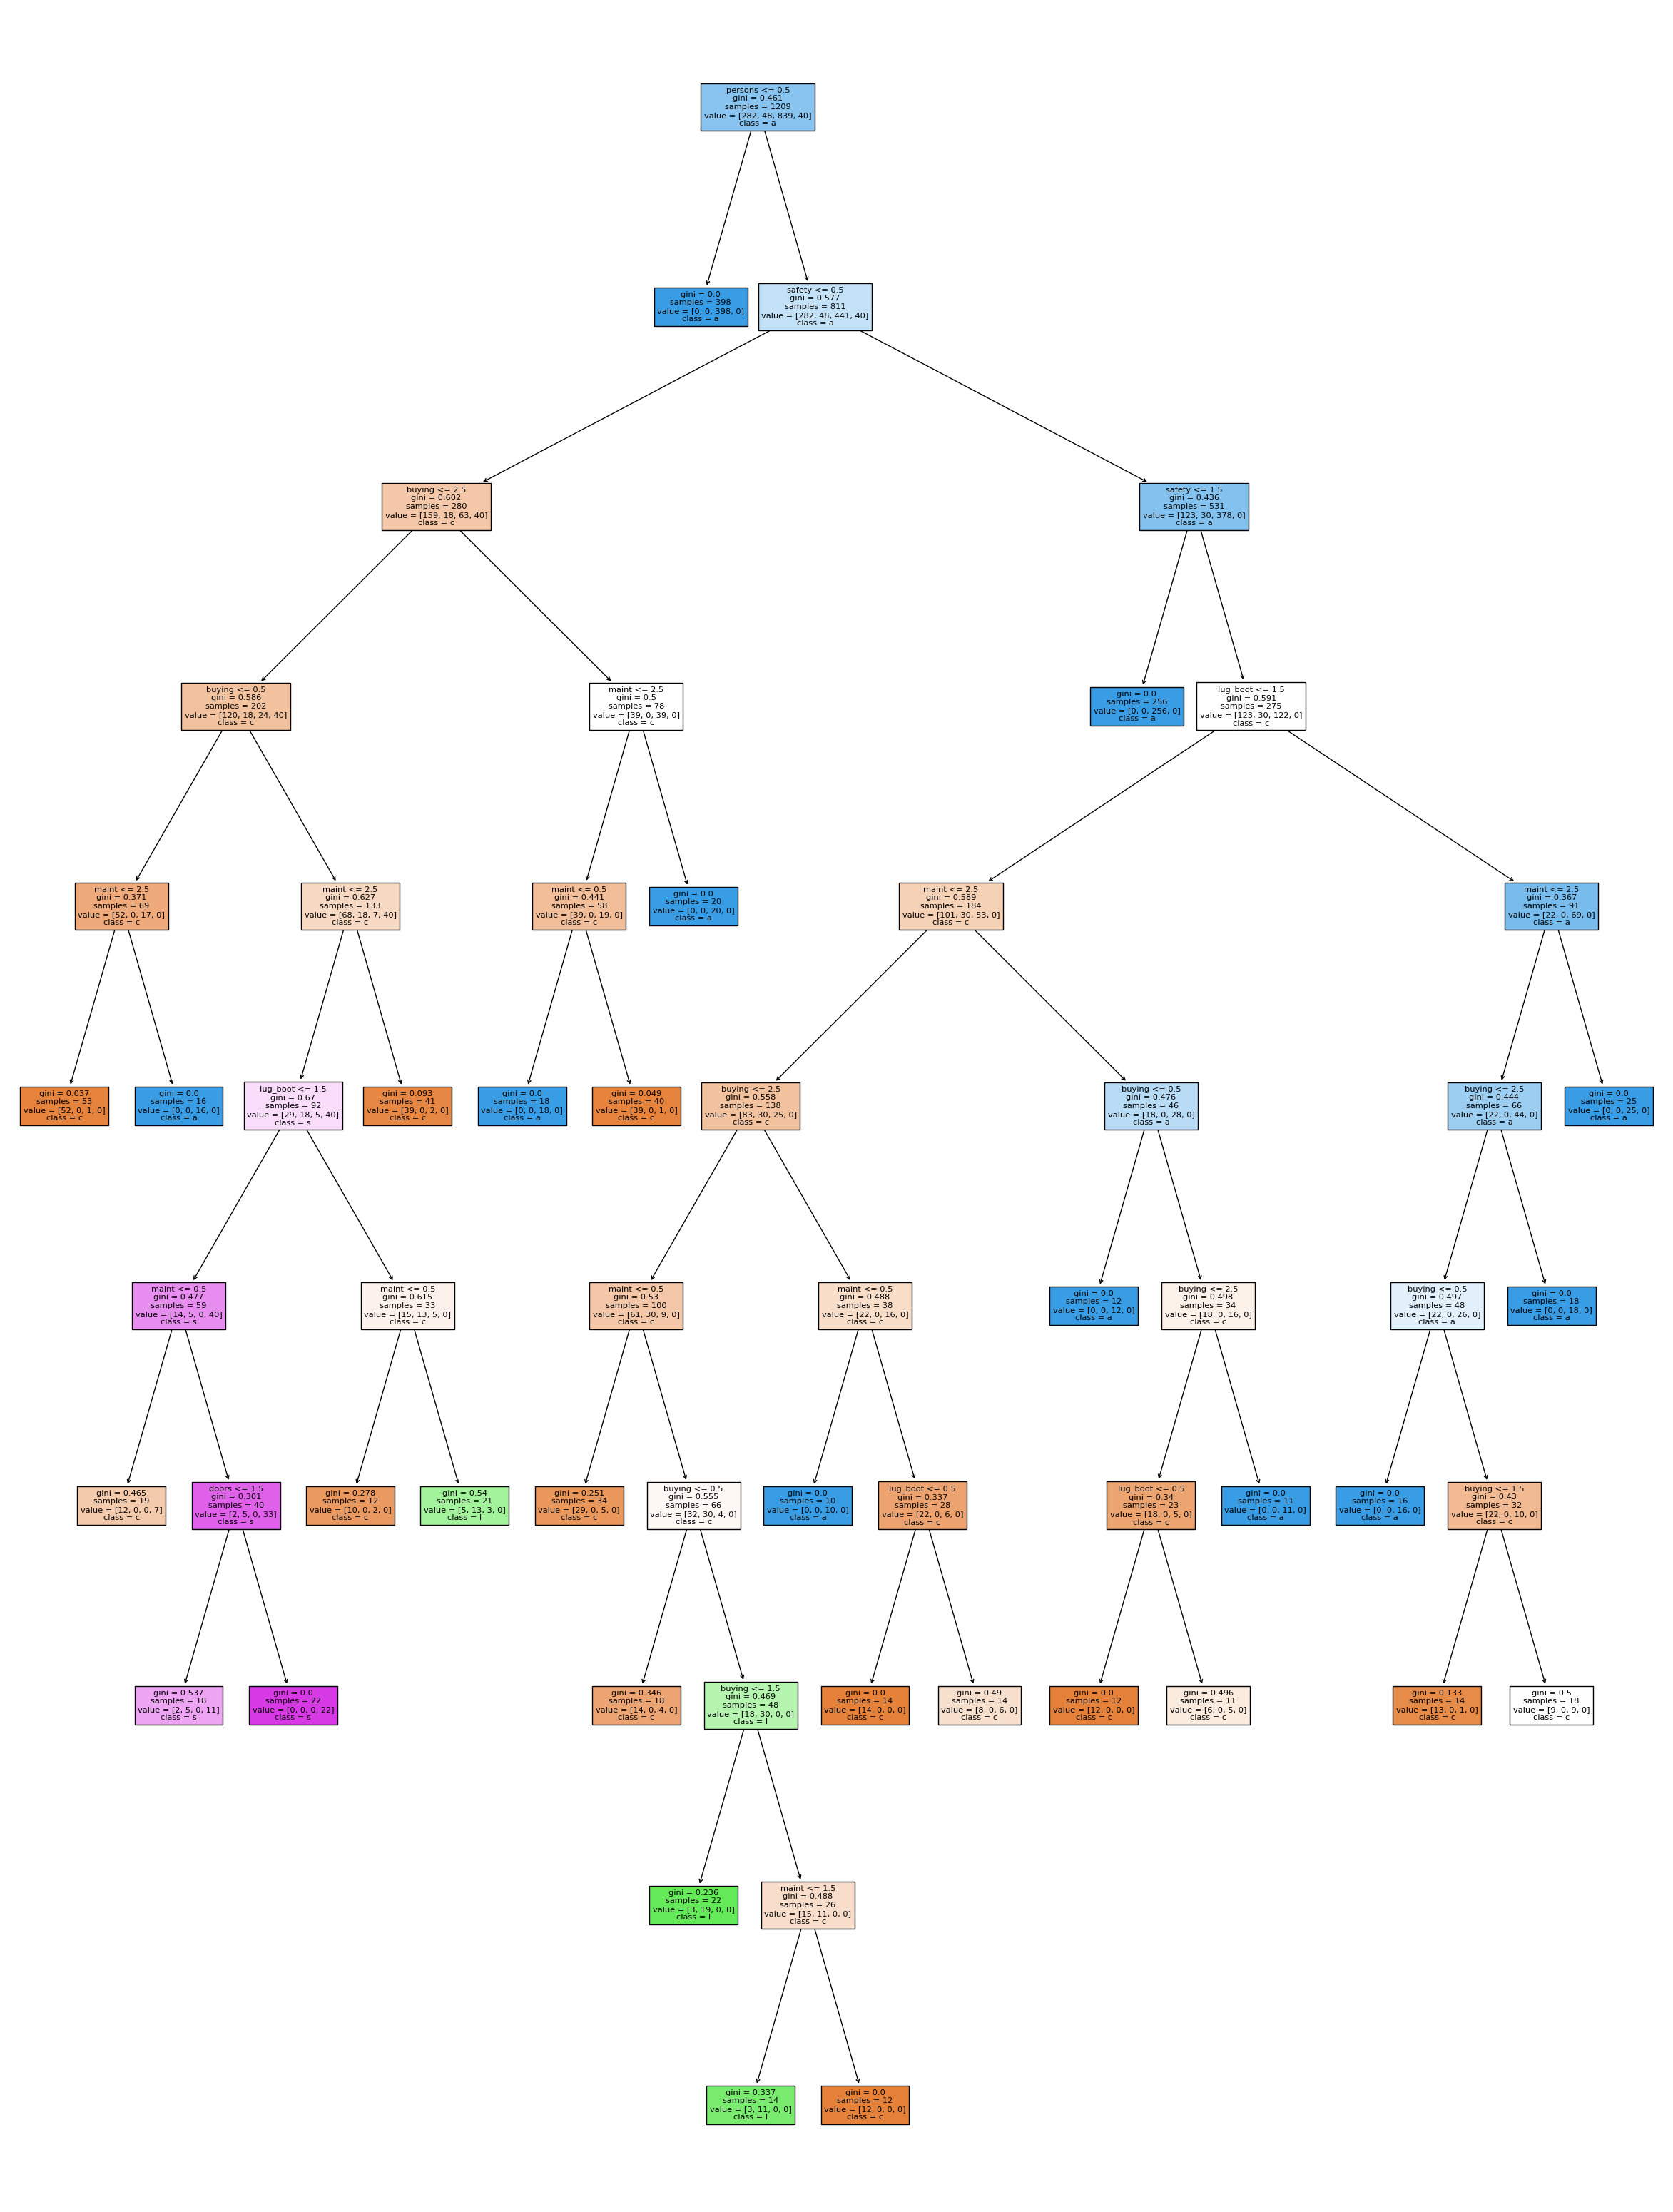

In [26]:
%%time

# it will take 5 to 6 mins to create image so wait....

fig = plt.figure(figsize=(30,40))
_ = tree.plot_tree(model_dt2,
                   feature_names=df.columns[:-1],
                   class_names=list(df.columns[-1]),
                   filled=True)
plt.savefig("base_model1.jpeg")
#

# **IRIS Data Set**

In [28]:
pip install ucimlrepo

In [30]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

df = pd.DataFrame(X)
df["Category"] = y
df.head()


,sepal length,sepal width,petal length,petal width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
## Spliting data train test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print('Test Size: ', X_train.shape,y_train.shape)
print('Test Size: ', X_test.shape,y_test.shape)

Test Size:  (105, 4) (105, 1)
Test Size:  (45, 4) (45, 1)


In [35]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()

##saclar.fir.(X_train)

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [37]:
## run basic model
from sklearn.linear_model import LogisticRegression

## creat a modal
classifier=LogisticRegression()

## fitting training data to the modal
classifier.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
## prediction
y_pred=classifier.predict(X_test_scaled)

In [41]:
print(list(zip(y_test,y_pred)))

[('class', 'Iris-versicolor')]


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_test,y_pred)

1.0

In [45]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

In [47]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## **Decision Tree with IRIS Data Set**

In [49]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

df = pd.DataFrame(X)
df["Category"] = y
df.head()


,sepal length,sepal width,petal length,petal width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df["Category"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
df["Label"] = df["Category"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


In [55]:
df = df.sample(frac=1)

In [57]:
df.shape

(150, 6)

In [59]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Category', 'Label'],
      dtype='object')

In [61]:
df.head()

,sepal length,sepal width,petal length,petal width,Category,Label
1,4.9,3.0,1.4,0.2,Iris-setosa,0
78,6.0,2.9,4.5,1.5,Iris-versicolor,1
57,4.9,2.4,3.3,1.0,Iris-versicolor,1
18,5.7,3.8,1.7,0.3,Iris-setosa,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,1


In [63]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df['Label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

model_dt3 = DecisionTreeClassifier()

model_dt3.fit(X_train, y_train)
print("Dept: ", model_dt3.get_depth())

# prediction on Test Data
y_pred2 = model_dt3.predict(X_test)

# Confusion Matrix
print("---------------Confusion Matrix----------------------")
print(confusion_matrix(y_test, y_pred2))
print()
print("---------------Classification Report----------------------")
print(classification_report(y_test, y_pred2))
print()
print("---------------Accuracy Score----------------------")
print(accuracy_score(y_test, y_pred2))

Dept:  5
---------------Confusion Matrix----------------------
[[13  0  0]
 [ 0 14  1]
 [ 0  1 16]]

---------------Classification Report----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


---------------Accuracy Score----------------------
0.9555555555555556


CPU times: user 831 ms, sys: 75 ms, total: 906 ms
Wall time: 1.24 s


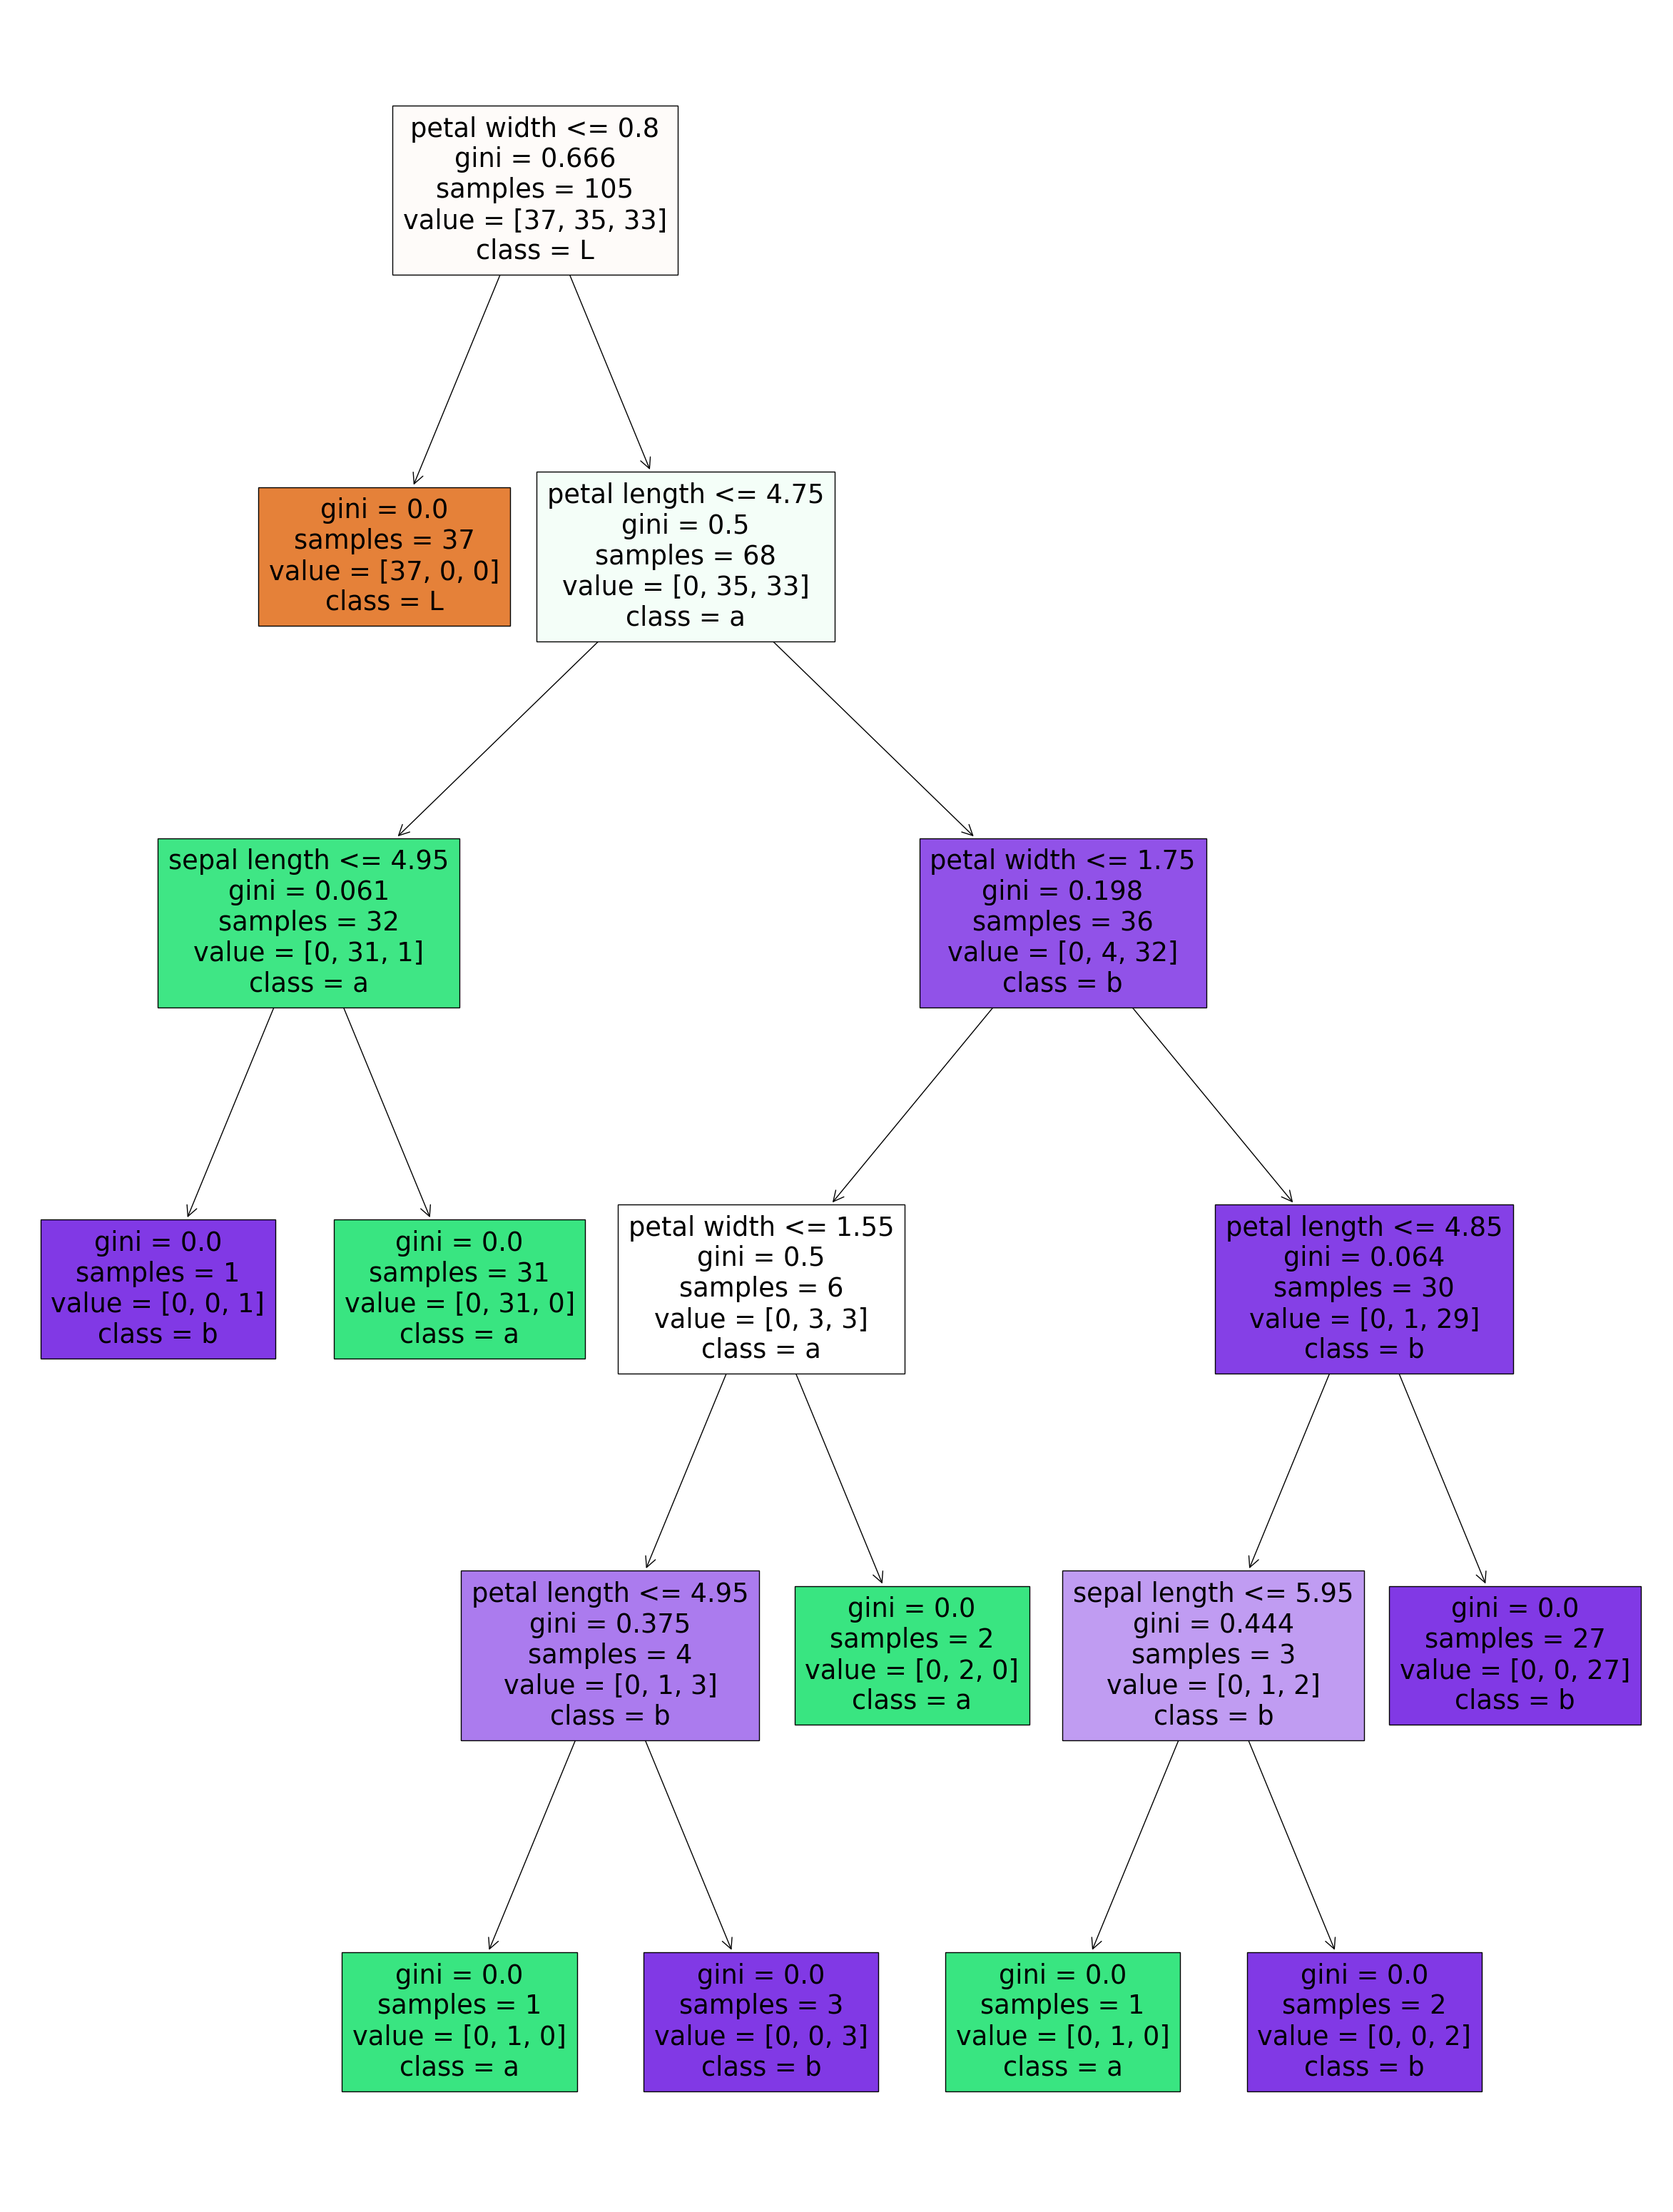

In [65]:
%%time

# it will take 5 to 6 mins to create image so wait....

fig = plt.figure(figsize=(30,40))
_ = tree.plot_tree(model_dt3,
                   feature_names=df.columns[:-1],
                   class_names=list(df.columns[-1]),
                   filled=True)
plt.savefig("base_model2.jpeg")
#